In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

import methods_comparison

# SFA

In [2]:
t = np.linspace(0, 200, 10000)
x = np.stack([np.sin(.25 * t), np.cos(t)]).T
y = x.dot(stats.ortho_group.rvs(4)[:2])
y += np.random.randn(*y.shape) / 40.
y -= y.mean(axis=0, keepdims=True)

In [3]:
y.shape

(10000, 4)

In [4]:
u, s, vh = np.linalg.svd(y)
whiten = vh.T.dot(np.diag(1./s))
yw = y.dot(whiten)
yp = np.diff(yw, axis=0)

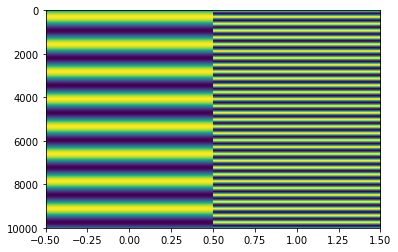

In [5]:
plt.imshow(x, aspect='auto')
plt.show()

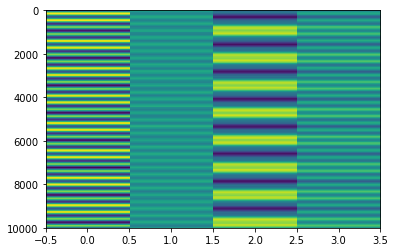

In [6]:
plt.imshow(y, aspect='auto')
plt.show()

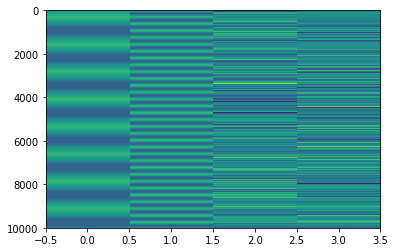

In [7]:
plt.imshow(yw, aspect='auto')
plt.show()

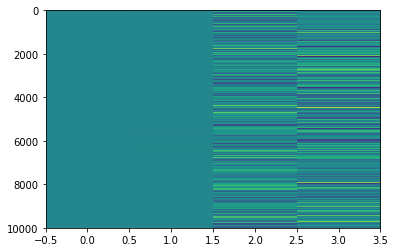

In [8]:
plt.imshow(yp, aspect='auto')
plt.show()

In [9]:
u, s, vh = np.linalg.svd(yp, full_matrices=False)
proj = vh.T

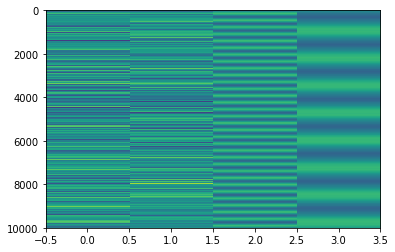

In [10]:
y_proj = y.dot(whiten.dot(proj))
plt.imshow(y_proj, aspect='auto')
plt.show()

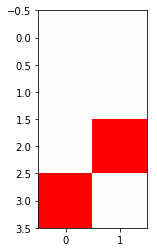

In [11]:
y_norm = y_proj - y_proj.mean(axis=0, keepdims=True)
y_norm /= np.linalg.norm(y_norm, axis=0, keepdims=True)
x_norm = x - x.mean(axis=0, keepdims=True)
x_norm /= np.linalg.norm(x_norm, axis=0, keepdims=True)
corr = y_norm.T.dot(x_norm)**2
plt.imshow(corr, vmin=-1, vmax=1, cmap='bwr')
plt.show()

In [12]:
corr

array([[9.10948625e-09, 1.49033941e-08],
       [7.01582402e-09, 1.33129267e-09],
       [2.42710641e-03, 9.96182203e-01],
       [9.96343228e-01, 2.53019829e-03]])

In [13]:
SFA = methods_comparison.SlowFeatureAnalysis(2)

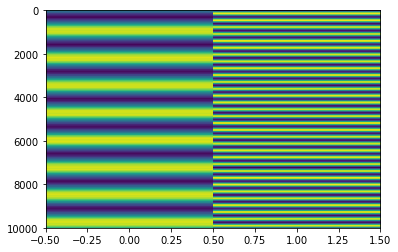

In [19]:
y_est = SFA.fit_transform(y)
plt.imshow(y_est, aspect='auto')
plt.show()

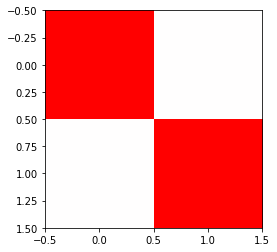

In [17]:
y_norm = y_est - y_est.mean(axis=0, keepdims=True)
y_norm /= np.linalg.norm(y_norm, axis=0, keepdims=True)
corr = y_norm.T.dot(x_norm)**2
plt.imshow(corr, vmin=-1, vmax=1, cmap='bwr')
plt.show()

In [18]:
corr

array([[0.99634323, 0.0025302 ],
       [0.00242711, 0.9961822 ]])